In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
df1 = pd.read_csv("/home/udit/Documents/cognet/train.csv")
X_train=np.array(df1.iloc[:33600,1:]).T
#X_train[:,2]=X_train[:,2]/1000
#X_train = preprocessing.normalize(X_train)
Y_train=np.array(df1.iloc[:33600,0]).T
#Y_train = preprocessing.normalize(Y_train)
df2 = pd.read_csv("/home/udit/Documents/cognet/test.csv")
X_test = np.array(df1.iloc[33600:,1:]).T
X_test = X_test/255
#X_test = preprocessing.normalize(X_test)
Y_test=np.array(df1.iloc[33600:,0]).T
#print(X_train.shape)
m=Y_train.shape[0]
#print(m)
Y_train=(Y_train.reshape(m,1))
Y_test=(Y_test.reshape(Y_test.shape[0],1))
#print(Y_train.shape)
#print(X_test.shape)
#print(Y_test.shape)
#print(Y_train)

/home/udit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


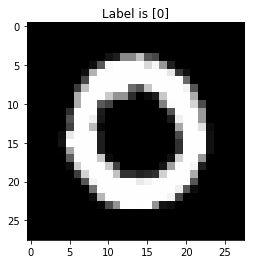

In [2]:
        label = np.array(Y_train[1])

        # The rest of columns are pixels
        pixels = np.array(X_train.T[1][:]) 

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))

        # Plot
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()

In [3]:
#Initialise parameters 
#Sigmoid 
#Relu
#Sigmoid_b
#Relu_b 
#Linear_for
#Linear_activation_for
#Forward_prop
#Cost
#Linear_b
#Linear_activation_b
#Backpropagation 
#Update_parameters
#NN_model
#Predict

In [4]:
#defining one_hot encoding
Y_t=[]
#print(Y_train.shape)
for i in range (len(Y_train)):
    l=[1 if Y_train[i]==j else 0 for j in range(10)]
    Y_t.append(np.array(l))
Y_t=np.array(Y_t)
Y_t=Y_t.T
print(Y_t.shape)


(10, 33600)


In [5]:
Y_te=[]
#print(Y_train.shape)
for i in range (len(Y_test)):
    l=[1 if Y_test[i]==j else 0 for j in range(10)]
    Y_te.append(np.array(l))
Y_te = np.array(Y_te)
Y_te = Y_te.T
print(Y_te.shape)
print(Y_te)

(10, 8400)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [6]:
def initialise_parameters(layer_dims):
    np.random.seed(3)
    l = len(layer_dims)
    parameters={}
    for i in range (1,l):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*0.01
        parameters['b'+str(i)] = np.zeros((layer_dims[i],1))
        
    return parameters


In [7]:
layers_dims = [784,40,20,10]
#print(initialise_parameters(r))
parameters=initialise_parameters(layers_dims)
print(parameters['W'+str(1)].shape)
print(parameters['b'+str(1)].shape)
print(parameters['W'+str(2)].shape)
print(parameters['b'+str(2)].shape)
print(parameters['W'+str(3)].shape)
print(parameters['b'+str(3)].shape)

(342, 784)
(342, 1)
(171, 342)
(171, 1)
(84, 171)
(84, 1)


In [8]:
#sigmoid 
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s,z;

In [9]:
#relu
def relu(Z):
    
    A = np.maximum(0,Z)
     
    cache = Z 
    return A, cache


In [10]:
#softmax
def soft(Z):
    Z = Z
    t = np.exp(Z)
    A = []
    s=(np.sum(t,axis=0,keepdims=True))
    s=(t/s)
    #print(t)
    #print(s)
                
    cache = Z
    #print(cache.shape)
    return s,cache

In [11]:
#linear_forward
def linear_for(A,W,b):
    z = np.dot(W,A)+b
    
    cache = (A,W,b)
    return z,cache

In [12]:
#linear_activation_forward
def linear_activation_for(A,W,b,fun):
    if fun == 'sigmoid':
      
        z,linear_cache = linear_for(A,W,b)
     
        A,activation_cache = sigmoid(z)
        #print(A.shape)
        
    elif fun == 'relu':
   
        z,linear_cache = linear_for(A,W,b)
        A,activation_cache = relu(z)    
        #print(A.shape)
        
    elif fun == "soft":
        z,linear_cache = linear_for(A,W,b)
        A,activation_cache = soft(z)
        #print(A.shape)
        
    cache=(linear_cache,activation_cache)
    return A,cache;

In [13]:
#forward_prop
def forward_prop(X,parameters):
    
    L = len(parameters)//2
    A = X
    caches=[]
    
    for i in range (1,L):
        A_prev = A
    
        A,cache = linear_activation_for(A_prev,parameters['W'+str(i)],parameters['b'+str(i)],fun='relu')
        caches.append(cache)
        
        
    A,cache = linear_activation_for(A,parameters['W'+str(L)],parameters['b'+str(L)],fun='soft')
    caches.append(cache)
    return A,caches;

In [14]:
A,caches = forward_prop(X_train,parameters)
print(np.argmax(A,axis=0))
#print(caches)

[6 6 8 ... 8 6 6]


In [15]:
#cost function
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    #print(Y.shape,AL)
    cost = -1/m*(np.sum(np.sum(Y*np.log(AL))))
    #cost=cost/(2*m)
    
    return cost;

In [16]:
#print(A.shape)
#print(Y_train.shape)
c=compute_cost(A,Y_t)
print(c)

2.3032238932497093


In [17]:
def relu_back(dA, cache):
    
   
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    return dZ;

In [18]:
def sigmoid_back(dA , cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    #print(dA.shape)
    #print(s.shape)
    dZ = dA * s * (1-s)

    
    return dZ;

In [19]:
def soft_back(da,activation_cache):   
    Z=activation_cache

    dz=np.zeros(Z.shape)
    for k in range(Z.shape[1]):
        t,c=soft(Z[:,k])
        t=np.squeeze(t)
        SM = t.reshape((t.shape[0],1))
        jac = np.diag(t) - np.dot(SM, SM.T)
        dz[:,k]=np.dot(jac,da[:,k])
  
    return dz

In [20]:
def linear_back(dZ,cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m*(np.dot(dZ,A_prev.T))
    db = 1/m*(np.sum(dZ,axis=1, keepdims=True))
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev,dW,db

In [21]:
def linear_activation_back(dA,cache,activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_back(dA, activation_cache)
        dA_prev, dW, db = linear_back(dZ, linear_cache)
        
        
    elif activation == "sigmoid":
        
        dZ = sigmoid_back(dA, activation_cache)
        dA_prev, dW, db = linear_back(dZ, linear_cache)
    
    elif activation == "soft":
        
        dZ = soft_back(dA, activation_cache)
        dA_prev, dW, db = linear_back(dZ, linear_cache)
    
    return dA_prev, dW, db

In [22]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    dAL = - (np.divide(Y, AL)) 
    
   
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
   
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_back(dAL, current_cache, activation = 'soft')


    for l in reversed(range(L-1)):
        
       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_back(grads["dA"+str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        

    return grads

In [23]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters['W'+str(l+1)]-learning_rate*grads['dW'+str(l+1)]
        parameters["b" + str(l+1)] = parameters['b'+str(l+1)]-learning_rate*grads['db'+str(l+1)]
   
    return parameters

In [24]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.05, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []             
    
    parameters = initialise_parameters(layers_dims)
    
    for i in range(0, num_iterations):

        
        AL, caches = forward_prop(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
n_parameters = L_layer_model(X_train, Y_t, layers_dims, num_iterations = 1000, print_cost = True)


Cost after iteration 0: 2.303224
Cost after iteration 100: 1.755411
Cost after iteration 200: 0.228169
Cost after iteration 300: 0.130107
Cost after iteration 400: 0.179107
Cost after iteration 500: 0.103062
Cost after iteration 600: 0.291357
Cost after iteration 700: 0.163109


In [ ]:
A,caches = forward_prop(X_train, n_parameters)
print(A.shape)

In [ ]:
#print(np.argmax(A,axis=0))
#print(np.argmax(Y_t,axis=0))
q=np.argmax(A,axis=0)-np.argmax(Y_t,axis=0)
l=list(q)
#print(l.count(0))
print("Training_Accuracy:")
print(l.count(0)/20)


In [ ]:
#print(np.argmax(A,axis=0))
#print(np.argmax(Y_t,axis=0))

In [ ]:
A,caches = forward_prop(X_test, n_parameters)
print(A.shape)
print(Y_te.shape)
q=np.argmax(A,axis=0)-np.argmax(Y_te,axis=0)
l=list(q)
print(l.count(0))
print("Test_Accuracy:")
print(l.count(0)/15)
print(np.argmax(A,axis=0))
print(np.argmax(Y_te,axis=0))
